#El impacto del Covid-19 y las crisis economicas recientes enel número de suicidios a nivel mundial

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import sklearn.linear_model as skl 

In [167]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

!cp '/content/gdrive/MyDrive/Colab Notebooks/suicidios.csv' 'suicidios.csv'
!cp '/content/gdrive/MyDrive/Colab Notebooks/depre.csv' 'depre.csv'
!cp '/content/gdrive/MyDrive/Colab Notebooks/data1.csv' 'data1.csv'
!cp '/content/gdrive/MyDrive/Colab Notebooks/12.json' '12.json'

Mounted at /content/gdrive


In [123]:
dat= pd.read_csv('suicidios.csv')

Ahora es necesario filtrar los datos, removiendo datos innecesarios, y dejando solo el total de casos, y eliminando la distinción entre casos de hombres y mujeres, que es irrelevante paraa este análisis.

In [124]:
dataf = dat.loc[:,['LOCATION','SUBJECT','TIME','Value']]
data = dataf.set_index("SUBJECT")
data = data.drop(["MEN","WOMEN"], axis=0)
#Tuve problemas con los datos al graficarlos y ordenarlos por año lo resolvió
data = data.sort_values(by='TIME', ascending=True)

Ahora para hacernos una idea de como han cambiado los casos con el tiempo, podemos hacer una gráfica promediando los valores totales de cada año.

m = [-0.05112957], b = 116.51310137218714


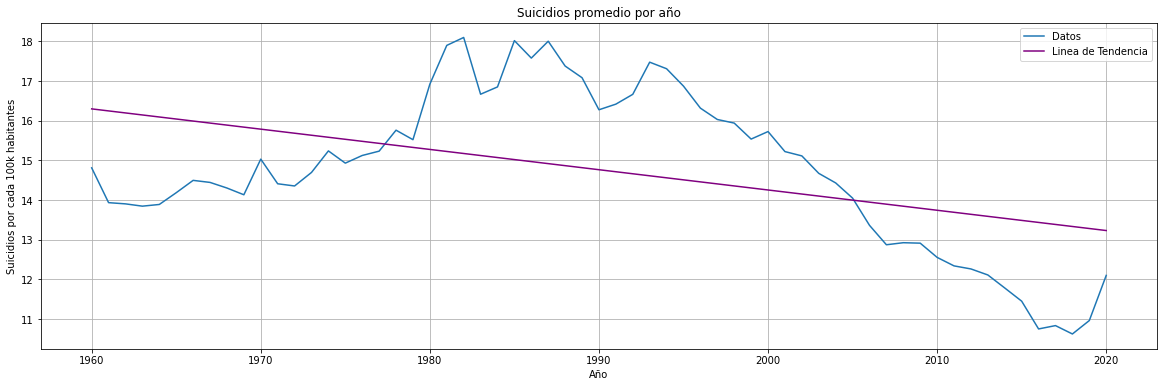

In [125]:
vla = data.groupby(['TIME'])['Value'].mean()
#convierte los df de pandas a numpy para poder trabajar con ellos de manera más fácil cuando se trata de operaciones y gráficos
vla.to_numpy()
yr = data.TIME.unique()

rgl = skl.LinearRegression()
rgl.fit(yr.reshape(-1,1), vla) 
rl = (rgl.coef_ * yr) + rgl.intercept_
print('m = ' + str(rgl.coef_) + ', b = ' + str(rgl.intercept_))

plt.subplots(1, figsize=(20,6))
plt.plot(yr, vla, "-",label="Datos")
plt.plot(yr , rl, color = 'purple', label="Linea de Tendencia")
plt.title('Suicidios promedio por año')
plt.xlabel('Año')
plt.ylabel('Suicidios por cada 100k habitantes')
plt.legend()
plt.grid()
plt.show()


De manera inmediata podemos  notar que el número de suicidios está decreciendo, pero tambien podemos ver algunos picos, uno de los más notorios es el de 2020, este pico podemos asumir que es debido al estrés causado debido a la pandemia de 2019.

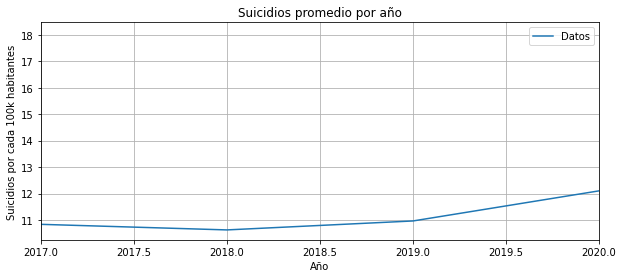

In [129]:
plt.subplots(1, figsize=(10,4))
plt.plot(yr, vla, "-",label="Datos")
plt.xlim( (2017,2020) )
plt.title('Suicidios promedio por año')
plt.xlabel('Año')
plt.ylabel('Suicidios por cada 100k habitantes')
plt.legend()
plt.grid()
plt.show()


Haciendo zoom en la gráfica podemos ver que este pico comienza en el año 2019, año en el cual comenzó la pandemia. Y haciendo uso de otr base de datospodemos corroborar que los casos de suicidio han subido junto con los casos de depresión. En este caso utilizamos a USA como referencia pues tienen bases de datos muy completas y al día

In [114]:
dpr= pd.read_csv('depre.csv')

In [115]:
#solo nos interesa el estimado nacional
datad = dat.loc[:,['Group','Time Period','Value']]

datad= datad.loc[datad['Group'] == 'National Estimate']
datad = datad.sort_values(by='Time Period', ascending=True)
datad = datad.rename(columns={"Time Period": "Time"})
datad

,Group,Time,Value
0,National Estimate,1,23.5
2698,National Estimate,1,NaN
7236,National Estimate,1,NaN
4467,National Estimate,1,NaN
4556,National Estimate,1,NaN
...,...,...,...
11328,National Estimate,50,31.2
11406,National Estimate,50,36.0
11484,National Estimate,51,23.8
11562,National Estimate,51,31.1


m = [-0.11268778], b = 32.95798692810458


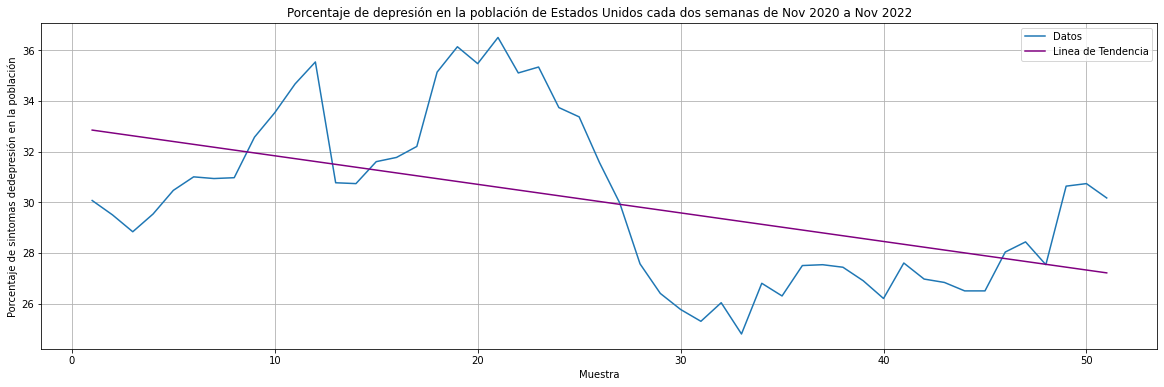

In [117]:
vla = datad.groupby(['Time'])['Value'].mean()
#convierte los df de pandas a numpy para poder trabajar con ellos de manera más fácil cuando se trata de operaciones y gráficos
vla.to_numpy()
yr = datad.Time.unique()

rgl = skl.LinearRegression()
rgl.fit(yr.reshape(-1,1), vla) 
rl = (rgl.coef_ * yr) + rgl.intercept_
print('m = ' + str(rgl.coef_) + ', b = ' + str(rgl.intercept_))

plt.subplots(1, figsize=(20,6))
plt.plot(yr, vla, "-",label="Datos")
plt.plot(yr , rl, color = 'purple', label="Linea de Tendencia")
plt.title('Porcentaje de depresión en la población de Estados Unidos cada dos semanas de Nov 2020 a Nov 2022')
plt.xlabel('Muestra')
plt.ylabel('Porcentaje de sintomas dedepresión en la población')
plt.legend()
plt.grid()
plt.show()

Podemos ver como el pico que teniamos de 2020 en suicidios coincide con casos de depresión y podemos ver que siguió subiendo, luego bajó y ahora sube de nuevo probablemente debido a la posible crisis economica  que empieza en 2022.

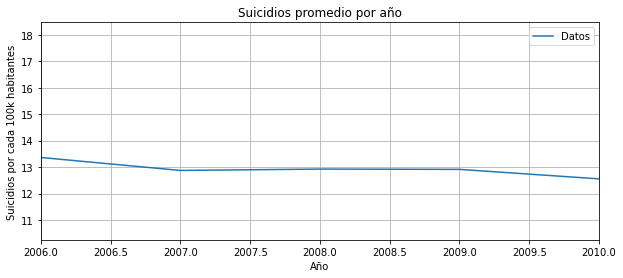

In [134]:
plt.subplots(1, figsize=(10,4))
plt.plot(yr, vla, "-",label="Datos")
plt.xlim( (2006,2010) )
plt.title('Suicidios promedio por año')
plt.xlabel('Año')
plt.ylabel('Suicidios por cada 100k habitantes')
plt.legend()
plt.grid()
plt.show()

Entre 2006 y 2010, vemos como sigue la tendencia de caida hasta 2007, luego sube hasta 2008 y de allí vuelve a bajar de nuevo. Si bien no hay un pico sí hay un "plateu" que es curioso sabiendo que teniamos una linea de tendencia que bajaba. Es muy posible que lo que mantuviera estos número durante ese espacio de tiempo fuera la crisis económica de 2008. Lo cual hace que la hipotesis anterior sobre la depresión y los problemas economicos de 2022 tenga más peso y nos da una mirada un poco sombría al futuro.

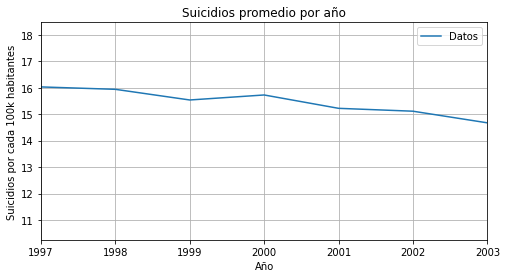

In [137]:
plt.subplots(1, figsize=(8,4))
plt.plot(yr, vla, "-",label="Datos")
plt.xlim( (1997,2003) )
plt.title('Suicidios promedio por año')
plt.xlabel('Año')
plt.ylabel('Suicidios por cada 100k habitantes')
plt.legend()
plt.grid()
plt.show()

Otro pico interesante de los ultimos años es el del año 2000. El peor tiempo de la recesión de USA y para la Union Europea en 1999 introdujeron el Euro, el cualcayó en valor rápidamente causando que el periodo de 2000-2002 fuera muy dificil economicamente.

m = [-0.02175568], b = 56.55446853516658


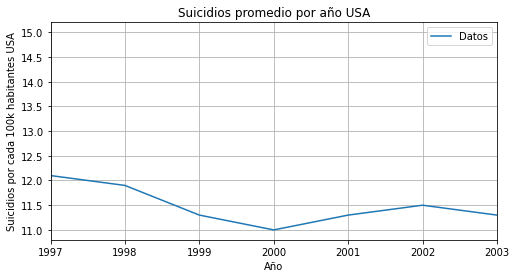

In [141]:
DUS=data.loc[data['LOCATION'] == 'USA']

vla = DUS.groupby(['TIME'])['Value'].mean()
#convierte los df de pandas a numpy para poder trabajar con ellos de manera más fácil cuando se trata de operaciones y gráficos
vla.to_numpy()
yr = DUS.TIME.unique()

rgl = skl.LinearRegression()
rgl.fit(yr.reshape(-1,1), vla) 
rl = (rgl.coef_ * yr) + rgl.intercept_
print('m = ' + str(rgl.coef_) + ', b = ' + str(rgl.intercept_))

plt.subplots(1, figsize=(8,4))
plt.plot(yr, vla, "-",label="Datos")
plt.xlim( (1997,2003) )
plt.title('Suicidios promedio por año USA')
plt.xlabel('Año')
plt.ylabel('Suicidios por cada 100k habitantes USA')
plt.legend()
plt.grid()
plt.show()

De hecho si nos fijamos en USA podemos ver como estos números empiezan a subir en el año 2000 y solo en 2002 empiezan a bajar.

Otro lugar de interés puede ser Uruguay durante la crisis economica que tuvo en el año 2002

In [168]:
dat1= pd.read_csv('data1.csv')
dat1

,Unnamed: 0,Unnamed: 1,Crude suicide rates (per 100 000 population),Crude suicide rates (per 100 000 population).1,Crude suicide rates (per 100 000 population).2,Crude suicide rates (per 100 000 population).3,Crude suicide rates (per 100 000 population).4,Crude suicide rates (per 100 000 population).5,Crude suicide rates (per 100 000 population).6,Crude suicide rates (per 100 000 population).7,...,Crude suicide rates (per 100 000 population).10,Crude suicide rates (per 100 000 population).11,Crude suicide rates (per 100 000 population).12,Crude suicide rates (per 100 000 population).13,Crude suicide rates (per 100 000 population).14,Crude suicide rates (per 100 000 population).15,Crude suicide rates (per 100 000 population).16,Crude suicide rates (per 100 000 population).17,Crude suicide rates (per 100 000 population).18,Crude suicide rates (per 100 000 population).19
0,Country,Sex,2019,2018,2017,2016,2015,2014,2013,2012,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
1,Uruguay,Both sexes,21.2 [16.9-26.2],21.2 [17.1-25.8],20.8 [17.0-24.9],21.1 [17.5-25.0],18.6 [15.6-21.9],17.4 [14.7-20.3],15.8 [13.4-18.5],17.8 [15.1-20.8],...,15.0 [12.7-17.3],15.1 [12.8-17.5],17.4 [14.8-31.2],15.5 [13.2-18.0],14.8 [12.6-17.1],15.3 [13.0-28.1],15.6 [13.3-18.1],19.8 [16.9-23.0],14.5 [12.3-16.8],16.0 [13.7-18.5]


m = [0.2775188], b = -540.3890225563911


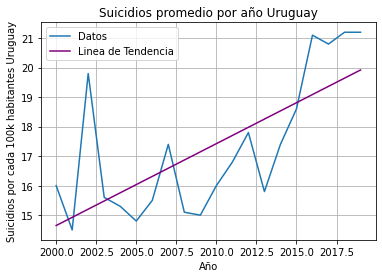

In [176]:
#se hace a mano pues los datos originales no están bien formateados

y=np.array([2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000])
rt=np.array([21.2,21.2,20.8,21.1,18.6,17.4,15.8,17.8,16.8,16.0,15.0,15.1,17.4,15.5,14.8,15.3,15.6,19.8,14.5,16.0])

rgl = skl.LinearRegression()
rgl.fit(y.reshape(-1,1), rt) 
rl = (rgl.coef_ * y) + rgl.intercept_
print('m = ' + str(rgl.coef_) + ', b = ' + str(rgl.intercept_))

plt.plot(y, rt, "-",label="Datos")
plt.plot(y , rl, color = 'purple', label="Linea de Tendencia")

plt.title('Suicidios promedio por año Uruguay')
plt.xlabel('Año')
plt.ylabel('Suicidios por cada 100k habitantes Uruguay')
plt.legend()
plt.grid()
plt.show()

Como era de esperarse 2002 tuvo un pico muy significativo para Uruguay debido a la antes mencionada crisis economica

# Conclusión

los efectos de crisis mundiales en la salud mental de la población son grandes y se deberian tomar mejores medidas a la hora de prepararse. Pues es posible quemuchas de esas personas pudieran tener un destino distinto con un mejor acompañamiento durante estas crisis.

# Fuentes

Suicidios desde 1960 hasta 2020: https://stats.oecd.org/sdmx-json/data/DP_LIVE/.SUICIDE.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en


Depresion en USA: https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp


Suicidios en Uruguay desde 2000 hasta 2019: https://apps.who.int/gho/data/view.main.MHSUICIDEv?lang=en